## Sales Volume - Regression

##### - Given sales history and attributes of some products, predict sales volume of new products

#### Import Libraries

In [1]:
import pandas as pd
from pycaret.regression import *
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import os
import seaborn as sns

In [2]:
os.chdir('./Python Projects/Predict Sales Volume')

#### Load in data and EDA

In [3]:
existing_products = pd.read_csv('existingproductattributes.csv')
new_products = pd.read_csv('newproductattributes.csv')

In [4]:
print('The shape of \'existing_products\' is: ' + str(existing_products.shape))
print('The shape of \'new_products\' is: ' + str(new_products.shape))

The shape of 'existing_products' is: (80, 18)
The shape of 'new_products' is: (24, 18)


##### - Both are 18 columns wide

In [5]:
existing_products.columns == new_products.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

##### - All column names are the same

In [6]:
existing_products.head()

,ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
0,PC,101,949.00,3,3,2,0,0,2,0,0.9,1967.0,25.8,23.94,6.62,16.89,0.15,12
1,PC,102,2249.99,2,1,0,0,0,1,0,0.9,4806.0,50.0,35.00,31.75,19.00,0.25,8
2,PC,103,399.00,3,0,0,0,0,1,0,0.9,12076.0,17.4,10.50,8.30,10.20,0.08,12
3,Laptop,104,409.99,49,19,8,3,9,7,8,0.8,109.0,5.7,15.00,9.90,1.30,0.08,196
4,Laptop,105,1079.99,58,31,11,7,36,7,20,0.7,268.0,7.0,12.90,0.30,8.90,0.09,232


In [7]:
new_products.head()

,ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
0,PC,171,699.0,96,26,14,14,25,12,3,0.7,2498,19.9,20.63,19.25,8.39,0.25,0
1,PC,172,860.0,51,11,10,10,21,7,5,0.6,490,27.0,21.89,27.01,9.13,0.20,0
2,Laptop,173,1199.0,74,10,3,3,11,11,5,0.8,111,6.6,8.94,12.80,0.68,0.10,0
3,Laptop,175,1199.0,7,2,1,1,1,2,1,0.6,4446,13.0,16.30,10.80,1.40,0.15,0
4,Laptop,176,1999.0,1,1,1,3,0,0,1,0.3,2820,11.6,16.81,10.90,0.88,0.23,0


In [8]:
existing_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
ProductType              80 non-null object
ProductNum               80 non-null int64
Price                    80 non-null float64
x5StarReviews            80 non-null int64
x4StarReviews            80 non-null int64
x3StarReviews            80 non-null int64
x2StarReviews            80 non-null int64
x1StarReviews            80 non-null int64
PositiveServiceReview    80 non-null int64
NegativeServiceReview    80 non-null int64
Recommendproduct         80 non-null float64
BestSellersRank          65 non-null float64
ShippingWeight           80 non-null float64
ProductDepth             80 non-null float64
ProductWidth             80 non-null float64
ProductHeight            80 non-null float64
ProfitMargin             80 non-null float64
Volume                   80 non-null int64
dtypes: float64(8), int64(9), object(1)
memory usage: 11.4+ KB


##### - Volume is the target. One feature ('BestSellersRank') has a few null values.
##### - On first glance, the most important features are most likely 'Price' and 'Recommendproduct'
##### - Some features can be ignored, like 'ProfitMargin', 'ProductNum', and possibly the product dimensions (though they might also be helpful...will have to see)
##### - Keep in mind we're ultimately looking for profit, so need to multiply margin by volume to get full profitability of each item

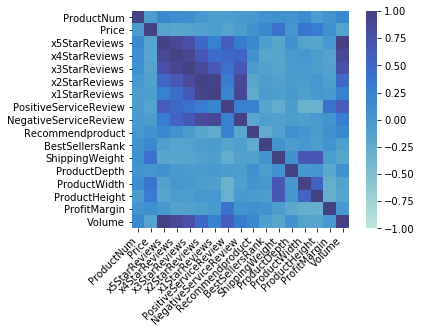

In [9]:
corr = existing_products.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 2, square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

##### - Some features holding review information are too highly correlated to target

#### Using Pycaret

In [10]:
reg = setup(existing_products, target = 'Volume',
            ignore_features = ['ProductNum', 'BestSellersRank', 'x5StarReviews', 'x4StarReviews', 'x3StarReviews',
                               'PositiveServiceReview', 'NegativeServiceReview', 'ProfitMargin'],
            session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(80, 18)"
4,Missing Values,True
5,Numeric Features,15
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
best_models = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,520.6,2.439e+06,931.5,-0.3679,1.336,2.642,0.6698
1,Support Vector Machine,715.3,2.941e+06,1099,-0.6285,1.996,3.942,0.0033
2,Random Forest,539.9,2.767e+06,1043,-0.9128,1.127,1.521,0.1418
3,K Neighbors Regressor,644.3,2.356e+06,979,-1.32,1.898,7.66,0.0028
4,Light Gradient Boosting Machine,623.9,2.371e+06,971.2,-1.816,1.832,7.228,0.0153
5,AdaBoost Regressor,597.7,3.324e+06,1105,-2.089,1.38,3.354,0.0637
6,Extra Trees Regressor,583.9,3.277e+06,1140,-2.158,1.142,2.341,0.1018
7,Gradient Boosting Regressor,616.1,3.597e+06,1201,-2.405,1.068,1.907,0.0338
8,Decision Tree,624.1,3.357e+06,1198,-2.561,1.442,1.205,0.0034
9,Extreme Gradient Boosting,720.4,4.887e+06,1448,-5.287,0.9912,1.121,0.0656


In [13]:
print(best_models)

[<catboost.core.CatBoostRegressor object at 0x000001DD62E15100>, SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)]


##### - Top 3 models are CatBoost Regressor, SVM, and RF

In [14]:
svm = create_model('svm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,381.6,2.493e+05,499.3,-0.0004,1.96,7.146
1,248.1,6.638e+04,257.6,-0.5228,2.223,11.54
2,575,7.715e+05,878.3,-0.314,1.762,3.556
3,272,1.921e+05,438.3,-0.0728,1.545,3.757
4,760.5,8.466e+05,920.1,-1.429,1.952,1.646
5,821.4,1.059e+06,1029,-0.9706,2.847,0.8983
6,228.7,6.174e+04,248.5,-0.0882,1.589,4.522
7,2517,2.46e+07,4960,-0.3059,2.503,3.869
8,653.7,5.939e+05,770.7,-1.646,1.884,1.798
9,696,9.681e+05,983.9,-0.9352,1.701,0.6892


In [15]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,177.5,1.346e+05,366.8,0.46,0.6896,0.7228
1,121.8,3.682e+04,191.9,0.1554,1.007,1.753
2,1285,6.804e+06,2608,-10.59,1.374,3.471
3,204.1,1.223e+05,349.7,0.3169,0.7854,1.091
4,212.2,1.258e+05,354.6,0.6391,0.5387,0.3362
5,369.2,4.588e+05,677.3,0.1466,2.655,0.3089
6,165.1,4.307e+04,207.5,0.2407,1.114,2.113
7,1973,1.883e+07,4339,0.0006,0.9531,0.4398
8,284.7,1.067e+05,326.6,0.5247,1.325,3.762
9,606.1,1.012e+06,1006,-1.024,0.8264,1.208


In [16]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,302,1.699e+05,412.2,0.3182,1.477,3.869
1,142.2,3.184e+04,178.4,0.2696,1.523,4.518
2,1134,4.436e+06,2106,-6.555,1.131,2.317
3,184.5,5.298e+04,230.2,0.7041,1.155,2.265
4,217,7.13e+04,267,0.7954,1.081,1.859
5,344.7,4.552e+05,674.7,0.1531,2.431,0.2757
6,185.9,4.81e+04,219.3,0.1521,1.349,2.989
7,1975,1.871e+07,4325,0.0071,0.9719,0.3914
8,417.1,2.797e+05,528.8,-0.2461,1.623,7.192
9,303.4,1.39e+05,372.8,0.7222,0.6161,0.7416


In [17]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,462.9312,1.663039e+06,1289.5888,0.1614,1.4192,1.1598


,Price,x2StarReviews,x1StarReviews,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProductType_Accessories,ProductType_Display,ProductType_ExtendedWarranty,...,ProductType_Laptop,ProductType_Netbook,ProductType_PC,ProductType_Printer,ProductType_PrinterSupplies,ProductType_Smartphone,ProductType_Software,ProductType_Tablet,Volume,Label
0,169.26,6.0,21.0,32.00,15.10,11.70,19.60,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,80.0,379.000
1,149.99,1.0,4.0,10.00,20.00,15.30,6.40,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,84.960
2,129.99,6.0,9.0,32.20,15.70,15.90,12.40,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,296.0,390.640
3,1079.99,7.0,36.0,7.00,12.90,0.30,8.90,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,730.000
4,379.99,1.0,0.0,3.00,7.44,10.43,1.02,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,25.180
5,16.24,2.0,6.0,0.55,6.00,3.00,8.20,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,432.0,131.208
6,79.98,1.0,1.0,0.20,0.00,0.00,0.00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.930
7,349.99,2.0,10.0,5.00,7.57,10.47,1.43,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,103.800
8,119.99,0.0,2.0,1.80,10.60,9.40,4.70,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,45.704
9,3.84,4.0,10.0,1.00,6.50,4.20,1.50,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.0,379.280


In [18]:
final_model = finalize_model(rf)

In [19]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,176.7184,245167.6484,495.1441,0.8764,0.8588,0.5519


,Price,x2StarReviews,x1StarReviews,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProductType_Accessories,ProductType_Display,ProductType_ExtendedWarranty,...,ProductType_Laptop,ProductType_Netbook,ProductType_PC,ProductType_Printer,ProductType_PrinterSupplies,ProductType_Smartphone,ProductType_Software,ProductType_Tablet,Volume,Label
0,169.26,6.0,21.0,32.00,15.10,11.70,19.60,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,80.0,235.44
1,149.99,1.0,4.0,10.00,20.00,15.30,6.40,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,74.28
2,129.99,6.0,9.0,32.20,15.70,15.90,12.40,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,296.0,282.88
3,1079.99,7.0,36.0,7.00,12.90,0.30,8.90,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,533.24
4,379.99,1.0,0.0,3.00,7.44,10.43,1.02,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9.84
5,16.24,2.0,6.0,0.55,6.00,3.00,8.20,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,432.0,308.36
6,79.98,1.0,1.0,0.20,0.00,0.00,0.00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.24
7,349.99,2.0,10.0,5.00,7.57,10.47,1.43,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,98.80
8,119.99,0.0,2.0,1.80,10.60,9.40,4.70,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,53.98
9,3.84,4.0,10.0,1.00,6.50,4.20,1.50,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.0,342.68


In [20]:
predictions = predict_model(final_model, data = new_products)

In [21]:
predictions.head()

,ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume,Label
index,,,,,,,,,,,,,,,,,,,
0,PC,171,699.0,96,26,14,14,25,12,3,0.7,2498,19.9,20.63,19.25,8.39,0.25,0,723.80
1,PC,172,860.0,51,11,10,10,21,7,5,0.6,490,27.0,21.89,27.01,9.13,0.20,0,435.92
2,Laptop,173,1199.0,74,10,3,3,11,11,5,0.8,111,6.6,8.94,12.80,0.68,0.10,0,258.60
3,Laptop,175,1199.0,7,2,1,1,1,2,1,0.6,4446,13.0,16.30,10.80,1.40,0.15,0,13.88
4,Laptop,176,1999.0,1,1,1,3,0,0,1,0.3,2820,11.6,16.81,10.90,0.88,0.23,0,216.64


#### Using sk_learn

In [22]:
drop_columns_existing = ['ProductNum', 'BestSellersRank', 'x5StarReviews', 'x4StarReviews', 'x3StarReviews', 'PositiveServiceReview', 'NegativeServiceReview', 'ProfitMargin']

In [23]:
drop_columns_new = drop_columns_existing + ['Volume']

In [24]:
existing_products_train = existing_products.drop(drop_columns_existing, axis = 1)

In [25]:
existing_products_train = pd.get_dummies(existing_products_train)

In [26]:
new_products_train = new_products.drop(drop_columns_new, axis = 1)

In [27]:
new_products_train = pd.get_dummies(new_products_train)

In [28]:
X = np.array(existing_products_train.drop(['Volume'], axis = 1))

In [29]:
y = np.array(existing_products_train['Volume'])

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .25)

##### Linear Regression

In [31]:
clf_lr = LinearRegression()

In [32]:
clf_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
accuracy_lr = clf_lr.score(X_test, y_test)

In [34]:
accuracy_lr

0.6764997812998936

In [35]:
predictions_lr = pd.DataFrame({'Actual': y_test, 'Predicted': clf_lr.predict(X_test)})

In [36]:
predictions_lr.head(10)

,Actual,Predicted
0,40,140.969079
1,592,522.219630
2,32,105.934075
3,1232,1111.517139
4,1396,-1.233142
5,904,131.349607
6,232,414.941368
7,32,228.460320
8,20,844.155726
9,40,-141.896688


In [37]:
new_predictions_lr = clf_lr.predict(new_products_train)

In [38]:
new_products_lr = new_products.copy()

In [39]:
new_products_lr['Predicted Vol'] = new_predictions_lr

##### Random Forest

In [40]:
regr = RandomForestRegressor(random_state = 0)

In [41]:
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [42]:
accuracy_rf = regr.score(X_test, y_test)

In [43]:
accuracy_rf

0.9104619986486331

In [44]:
predictions_rf = pd.DataFrame({'Actual': y_test, 'Predicted': regr.predict(X_test)})

In [45]:
predictions_rf

,Actual,Predicted
0,40,48.608000
1,592,751.240000
2,32,63.020857
3,1232,1232.000000
4,1396,1048.840000
5,904,666.320000
6,232,499.560000
7,32,29.360000
8,20,56.400000
9,40,71.990000


In [46]:
new_predictions_rf = regr.predict(new_products_train)

In [47]:
new_products_rf = new_products.copy()

In [48]:
new_products_rf['Predicted Vol'] = new_predictions_rf